In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_csv('advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


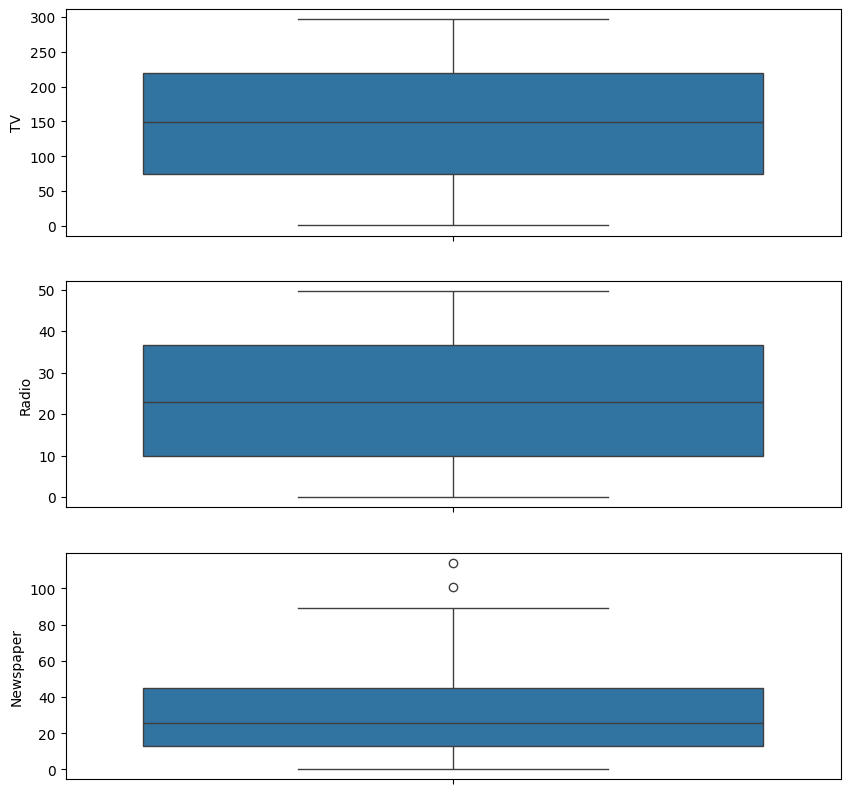

In [10]:
fig,axs=plt.subplots(3, figsize=(10,10))
plt1=sns.boxplot(data['TV'],ax=axs[0])
plt2=sns.boxplot(data['Radio'],ax=axs[1])
plt3=sns.boxplot(data['Newspaper'],ax=axs[2])
plt.show()

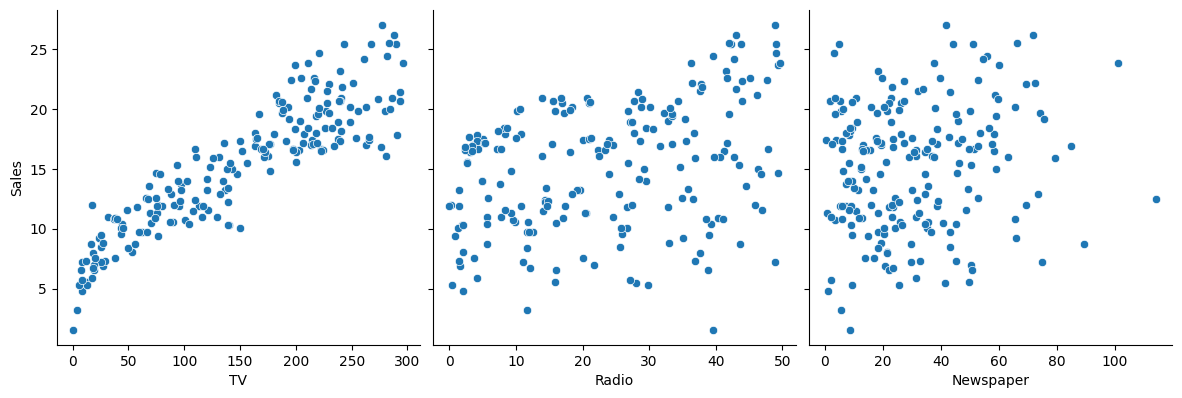

In [14]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

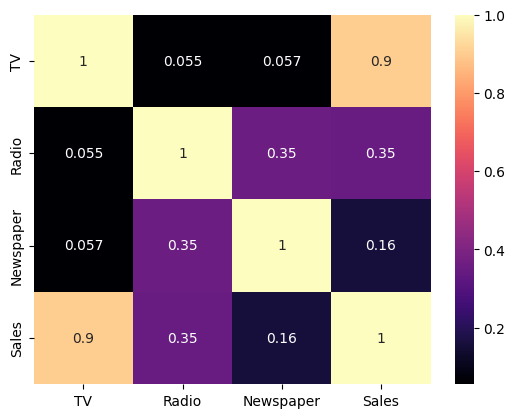

In [16]:
sns.heatmap(data.corr(), annot=True, cmap='magma')
plt.show()

In [17]:
X=data.drop(['Sales'],axis=1)
y=data['Sales']

In [18]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred=model.predict(X_test)

In [24]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [28]:
acc=r2_score(y_test,y_pred)
print(acc)

0.9059011844150826


In [31]:
y_pred_train=model.predict(X_train)
acc_train=r2_score(y_train,y_pred_train)
print(acc_train)

0.9001416005862131


In [32]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

2.9077569102710896
